# Dimensionality Reduction

- Now let's apply PCA to our dataset.
- We will develop our own implementation of PCA and then use scikit learn method. 
- We will also see the effect of (un) normalized data in PCA.

In [1]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision = 2, suppress=True)

## Generate example data

We are going to create random multivariate normal data specifying the correlation matrix between two dimensions.

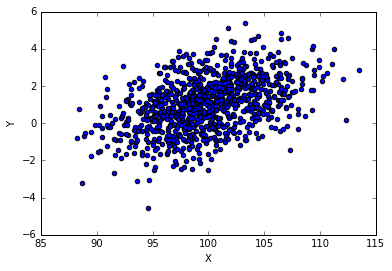

In [2]:
original_mean = [100, 1]
original_covariance = [[20, 3], [3, 2]]
X = np.random.multivariate_normal(original_mean, original_covariance, size=1000)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Manual PCA

Recall PCA steps:

1. Compute covariance matrix
1. Compute eigenvectors and eigenvalues
1. Select top k eigenvalues (and eigenvectors)
1. Rotate original data with eigenvector matrix

In [3]:
# 1. compute covariance matrix
# by default numpy.cov consider rows as variables, set rowvar=0
Sigma = np.cov(X, rowvar = 0)

# equivalent since covariance matrix is symmetric 
# Sigma2 = np.cov(np.transpose(X))

In [4]:
# compare to original covariance matrix
print(X.shape)
print(Sigma.shape)
Sigma

(1000, 2)
(2, 2)


array([[ 17.61,   2.58],
       [  2.58,   2.  ]])

In [5]:
# 2. Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Sigma)

In [6]:
print(eig_val.shape)
print(eig_vec.shape)
eig_val

(2,)
(2, 2)


array([ 18.03,   1.59])

**(aside) Rotate original data with eigenvector matrix to see the rotation effect**

We may expect to see that data is now *aligned* with horizontal and vertical axis. 

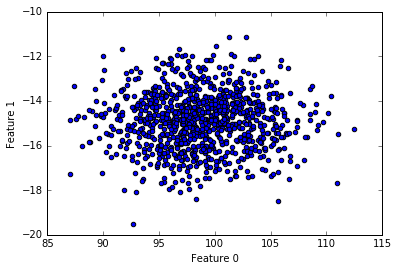

In [7]:
X_rotated = np.dot(X, eig_vec)

plt.scatter(X_rotated[:, 0], X_rotated[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Question: how should the covariance matrix of rotated data be?

In [8]:
np.cov(X_rotated, rowvar = 0)

array([[ 18.03,  -0.  ],
       [ -0.  ,   1.59]])

Let's continue with PCA!

In [9]:
# 2.b. according to the documentation eigenvalues does not need to be sorted, so let's do it
idx_sort = np.argsort(-eig_val)
print(idx_sort)

eig_val_sort = eig_val[idx_sort]
eig_vec_sort = eig_vec[:, idx_sort]

[0 1]


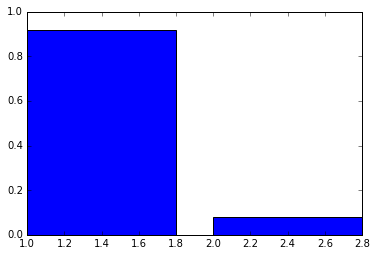

In [10]:
# 3- Select top k eigenvalues (and eigenvectors)
# Let's plot eigenvalues and percentage of total variance explained

eig_val_sort_percentage = eig_val_sort / np.sum(eig_val_sort)
plt.bar(range(1,(len(eig_val)+1)), eig_val_sort_percentage); #!!!

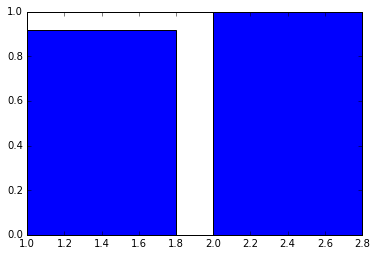

In [11]:
# in this case, with only two dimensions, 
# it is not very useful to plot the cumulative variance explained

eig_val_sort_cum = np.cumsum(eig_val_sort) / np.sum(eig_val_sort)
plt.bar(range(1,(len(eig_val)+1)), eig_val_sort_cum);

In this case, we only have two dimensions, so we would select only one dimension. As data is generated just from one distribution, the output is not very meaningfull. I leave here the code, and we will test it later. 

In [12]:
TOP_EIGEN = 1
eig_val_short = eig_val_sort[0:TOP_EIGEN]
eig_vec_short = eig_vec_sort[:,0:TOP_EIGEN]

print(eig_val_short.shape)
print(eig_vec_short.shape)

(1,)
(2, 1)


In [13]:
# 4. Rotate original data with reduced eigenvector matrix
X_pca = X.dot(eig_vec_short)
print(X_pca.shape)

(1000, 1)


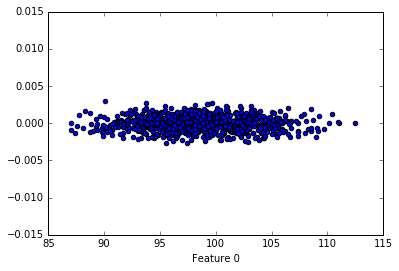

In [14]:
# we add some glitter to see the points
plt.scatter(X_pca, np.random.normal(scale=0.001, size=len(X_pca)))
plt.xlabel("Feature 0")
plt.show()

In [15]:
print(np.mean(X, axis=0))
print(np.std(X, axis=0))

[ 99.77   1.01]
[ 4.19  1.41]


We see that data is not scaled, so it could affect on the results, let's scale it.

### Manual PCA with scaled data

In [16]:
# Normalize data
from sklearn import preprocessing
X_norm = preprocessing.scale(X, axis=0)

# check
print(np.mean(X_norm, axis=0))
print(np.std(X_norm, axis=0))

[ 0.  0.]
[ 1.  1.]


[ 1.44  0.57]
[[ 0.71 -0.71]
 [ 0.71  0.71]]
[ 1.44  0.57]
[[ 0.71 -0.71]
 [ 0.71  0.71]]
(1,)
(2, 1)


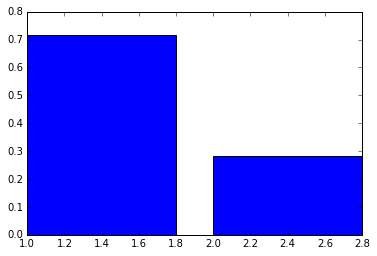

In [17]:
# PCA

# 1. compute covariance matrix
Sigma = np.cov(X_norm, rowvar = 0)

# 2. Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Sigma)

print (eig_val)
print (eig_vec)

# 2b. Sort eigenvalues
idx_sort = np.argsort(-eig_val)
eig_val_sort = eig_val[idx_sort]
eig_vec_sort = eig_vec[:, idx_sort]

# 3- Select top k eigenvalues (and eigenvectors)
eig_val_sort_percentage = eig_val_sort / np.sum(eig_val_sort)
plt.bar(range(1,(len(eig_val)+1)), eig_val_sort_percentage); 

print (eig_val_sort)
print (eig_vec_sort)

TOP_EIGEN = 1
eig_val_short = eig_val_sort[0:TOP_EIGEN]
eig_vec_short = eig_vec_sort[:,0:TOP_EIGEN]

print(eig_val_short.shape)
print(eig_vec_short.shape)

(1000, 2)


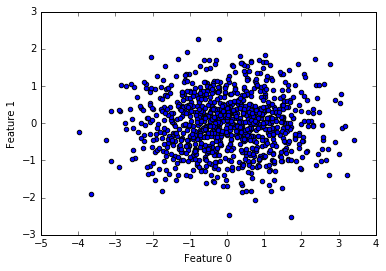

In [18]:
# plot rotated data (no dimension reduction)
X_norm_rotated = np.dot(X_norm, eig_vec_sort)
print (X_norm_rotated.shape)
plt.scatter(X_norm_rotated[:, 0], X_norm_rotated[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

(1000, 1)


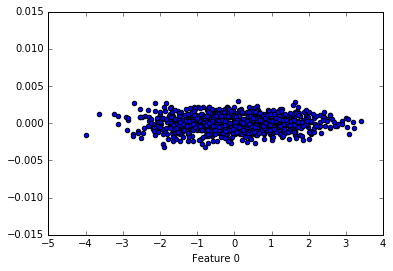

In [19]:
# plot rotated data (dimension reduction and glitter)
X_norm_rotated = np.dot(X_norm, eig_vec_short)
print (X_norm_rotated.shape)
plt.scatter(X_norm_rotated, np.random.normal(scale=0.001, size=len(X_norm_rotated)))
plt.xlabel("Feature 0")
plt.show()

# Real dataset

Now we will use a real dataset about wine to see PCA in action. 

In [20]:
data = pd.read_csv('wine.csv', sep='\t')

In [21]:
data.head()

,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color,Hue,OD280/OD315,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


We don't need the class for dimensionality reduction, so we construct a new dataframe without the column

In [22]:
data2 = data.loc[:,~data.columns.isin(['class'])]
print(data.shape)
print(data2.shape)

(178, 14)
(178, 13)


### Exercise: Apply PCA to this new dataset.

- Compute the eigendecomposition and rotated data with reduced dimension. 
- Plot two first components and add the original class as color to see if the decomposition is having any effect. 

Question: is it everything working ok?

Answer the following questions:
- what is the dimension of the covariance matrix?
- what are the eigenvalues?
- how much variance is explained by the first two eigenvalues?

Note: save dimension-reduced data in variable `data_pca`

In [23]:
# 1. compute covariance matrix
# by default numpy.cov consider rows as variables, set rowvar=0
Sigma = np.cov(data2, rowvar = 0)

# equivalent since covariance matrix is symmetric 
# Sigma2 = np.cov(np.transpose(data2))

In [24]:
print(data2.shape)
print(Sigma.shape)
Sigma[0:2]

(178, 13)
(13, 13)


array([[   0.66,    0.09,    0.05,   -0.84,    3.14,    0.15,    0.19,
          -0.02,    0.06,    1.03,   -0.01,    0.04,  164.57],
       [   0.09,    1.25,    0.05,    1.08,   -0.87,   -0.23,   -0.46,
           0.04,   -0.14,    0.64,   -0.14,   -0.29,  -67.55]])

In [25]:
# 2. Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Sigma)

In [26]:
print(eig_val.shape)
print(eig_vec.shape)
print('Eigenvalues: {}'.format(eig_val))

(13,)
(13, 13)
Eigenvalues: [ 99201.79    172.54      9.44      4.99      1.23      0.84      0.28
      0.15      0.11      0.01      0.02      0.04      0.07]


In [27]:
# 2.b. according to the documentation eigenvalues does not need to be sorted, so let's do it
idx_sort = np.argsort(-eig_val)
print(idx_sort)

eig_val_sort = eig_val[idx_sort]
eig_vec_sort = eig_vec[:, idx_sort]

[ 0  1  2  3  4  5  6  7  8 12 11 10  9]


In [28]:
eig_val_sort

array([ 99201.79,    172.54,      9.44,      4.99,      1.23,      0.84,
            0.28,      0.15,      0.11,      0.07,      0.04,      0.02,
            0.01])

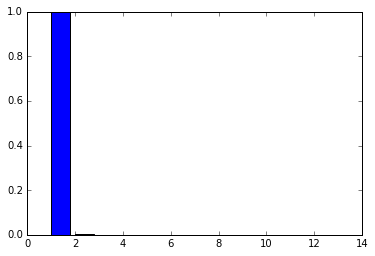

In [29]:
# 3- Select top k eigenvalues (and eigenvectors)
# Let's plot eigenvalues and percentage of total variance explained

eig_val_sort_percentage = eig_val_sort / np.sum(eig_val_sort)
plt.bar(range(1,(len(eig_val)+1)), eig_val_sort_percentage); #!!!

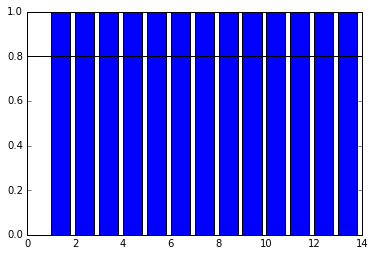

In [30]:
eig_val_sort_cum = np.cumsum(eig_val_sort) / np.sum(eig_val_sort)
plt.bar(range(1,(len(eig_val)+1)), eig_val_sort_cum);
plt.hlines(y=0.8, xmin=0, xmax=14);

In [31]:
# what is happening?
np.mean(data2, axis=0)

Alcohol                  13.000618
Malic Acid                2.336348
 Ash                      2.366517
 Alcalinity Ash          19.494944
Magnesium                99.741573
 Total Phenols            2.295112
Flavanoids                2.029270
Nonflavanoid phenols      0.361854
 Proanthocyanins          1.590899
Color                     5.058090
Hue                       0.957449
 OD280/OD315              2.611685
 Proline                746.893258
dtype: float64

In [32]:
TOP_EIGEN = 2
eig_val_short = eig_val_sort[0:TOP_EIGEN]
eig_vec_short = eig_vec_sort[:,0:TOP_EIGEN]

print(eig_val_short.shape)
print(eig_vec_short.shape)

(2,)
(13, 2)


In [33]:
# 4. Rotate original data with eigenvector matrix
data_pca = data2.dot(eig_vec_short)
print(data_pca.shape)

(178, 2)


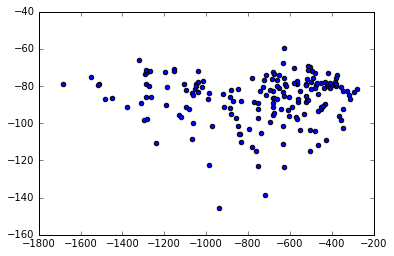

In [34]:
# note: data_pca is a dataframe
plt.scatter(data_pca[0], data_pca[1]);

Now we add the color to see the effect of the rotation. 

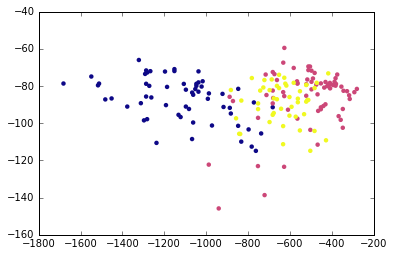

In [35]:
plt.scatter(data_pca[0], data_pca[1], c=data['class'], cmap="plasma", linewidths=0);

**Analysis**

We can see that the effect of the scale makes the PCA transformation a bit useless in capturing differences. 

Let's normalize the data and see how it makes a difference.

In [36]:
# Normalize data
from sklearn import preprocessing
data_norm = preprocessing.scale(data2, axis=0)

# check
print(np.mean(data_norm, axis=0))
print(np.std(data_norm, axis=0))

[-0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0.  0. -0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


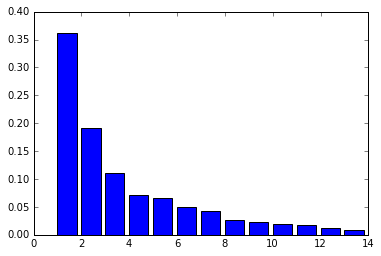

In [37]:
# PCA
# Exercise 

# ...
# 1. compute covariance matrix
Sigma = np.cov(data_norm, rowvar = 0)

# 2. Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Sigma)

idx_sort = np.argsort(-eig_val)
eig_val_sort = eig_val[idx_sort]
eig_vec_sort = eig_vec[:, idx_sort]

# 3- Select top k eigenvalues (and eigenvectors)
eig_val_sort_percentage = eig_val_sort / np.sum(eig_val_sort)
plt.bar(range(1,(len(eig_val)+1)), eig_val_sort_percentage); 

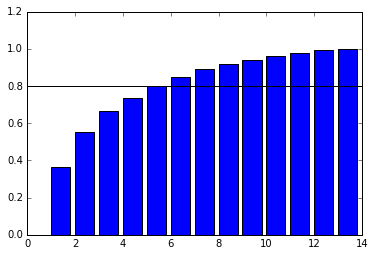

In [38]:
eig_val_sort_cum = np.cumsum(eig_val_sort) / np.sum(eig_val_sort)
plt.bar(range(1,(len(eig_val)+1)), eig_val_sort_cum);
plt.hlines(y=0.8, xmin=0, xmax=14);

In [39]:
eig_val_sort_cum

array([ 0.36,  0.55,  0.67,  0.74,  0.8 ,  0.85,  0.89,  0.92,  0.94,
        0.96,  0.98,  0.99,  1.  ])

In [40]:
TOP_EIGEN = 5
eig_val_short = eig_val_sort[0:TOP_EIGEN]
eig_vec_short = eig_vec_sort[:,0:TOP_EIGEN]

print(eig_val_short.shape)
print(eig_vec_short.shape)

(5,)
(13, 5)


In [41]:
# 4. Rotate original data with reduced eigenvector matrix
data_pca = data_norm.dot(eig_vec_short)
print(data_pca.shape)

(178, 5)


In [42]:
np.cov(data_pca, rowvar = 0)

array([[ 4.73, -0.  ,  0.  ,  0.  ,  0.  ],
       [-0.  ,  2.51, -0.  , -0.  ,  0.  ],
       [ 0.  , -0.  ,  1.45, -0.  ,  0.  ],
       [ 0.  , -0.  , -0.  ,  0.92, -0.  ],
       [ 0.  ,  0.  ,  0.  , -0.  ,  0.86]])

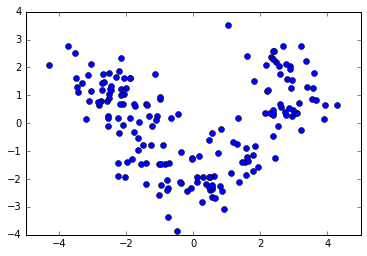

In [43]:
plt.plot(data_pca[:,0], data_pca[:,1], 'o');

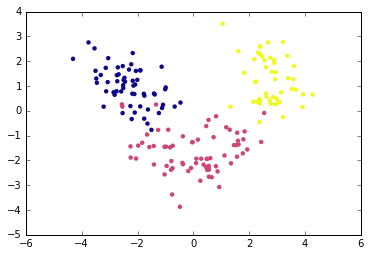

In [44]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=data['class'], cmap="plasma", linewidths=0);

[]

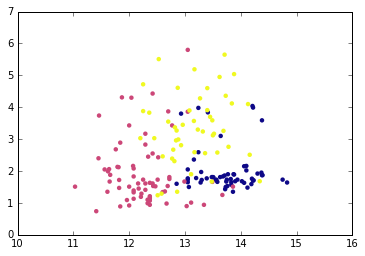

In [45]:
# original data
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data['class'], cmap="plasma", linewidths=0);
plt.plot()

[]

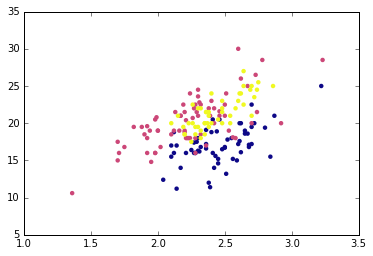

In [46]:
plt.scatter(data.iloc[:,2], data.iloc[:,3], c=data['class'], cmap="plasma", linewidths=0);
plt.plot()

## scikit-learn PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca_model = PCA()
data_pca_sklearn = pca_model.fit_transform(data_norm)

In [49]:
print('Default number of components: {}'.format(pca_model.n_components_))
print(pca_model.explained_variance_)
print(pca_model.explained_variance_ratio_)
print(np.cumsum(pca_model.explained_variance_ratio_))

Default number of components: 13
[ 4.71  2.5   1.45  0.92  0.85  0.64  0.55  0.35  0.29  0.25  0.23  0.17
  0.1 ]
[ 0.36  0.19  0.11  0.07  0.07  0.05  0.04  0.03  0.02  0.02  0.02  0.01
  0.01]
[ 0.36  0.55  0.67  0.74  0.8   0.85  0.89  0.92  0.94  0.96  0.98  0.99
  1.  ]


In [50]:
pca_model = PCA(n_components = 5)
data_pca_sklearn = pca_model.fit_transform(data_norm)

print(pca_model.explained_variance_)
print(pca_model.explained_variance_ratio_)
print(np.cumsum(pca_model.explained_variance_ratio_))

[ 4.71  2.5   1.45  0.92  0.85]
[ 0.36  0.19  0.11  0.07  0.07]
[ 0.36  0.55  0.67  0.74  0.8 ]


In [51]:
print(data_pca_sklearn[0:2])
print(data_pca[0:2])

[[-3.32  1.44 -0.17  0.22  0.69]
 [-2.21 -0.33 -2.03  0.29 -0.26]]
[[-3.32  1.44  0.17 -0.22  0.69]
 [-2.21 -0.33  2.03 -0.29 -0.26]]


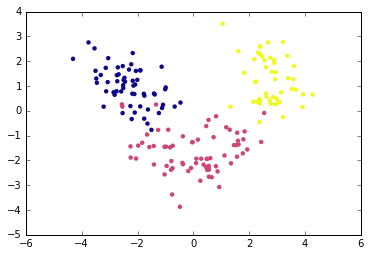

In [52]:
plt.scatter(data_pca_sklearn[:,0], data_pca_sklearn[:,1], c=data['class'], cmap="plasma", linewidths=0);

#### [Home] Exercise
Apply your favourite(s) ML algorithm to estimate the 'class' with the other parameters. Test if you appreciate any difference when applying PCA to the features and later apply your model. 

- performance?
- computational time?
- memory requirements?

# END.